Saving ima1.jpeg to ima1.jpeg


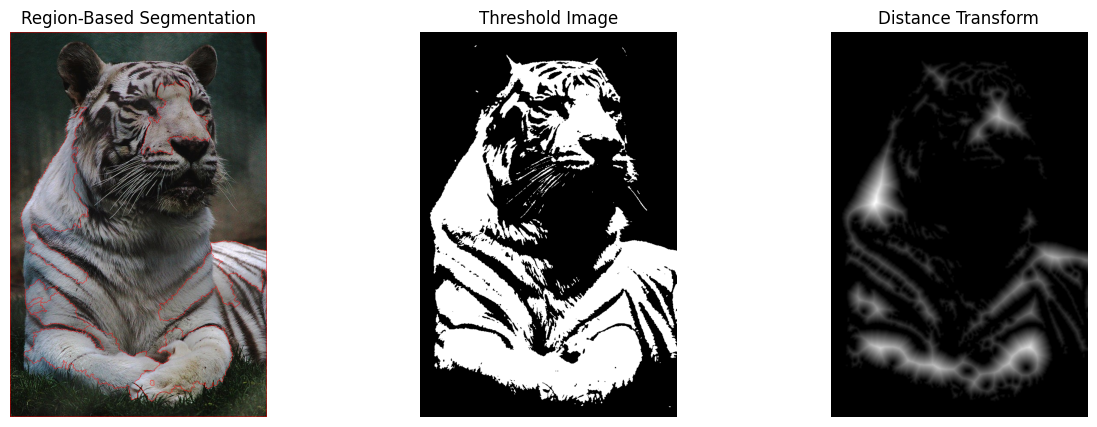

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Read image
image = cv2.imread(image_path)

if image is None:
    print("Error loading image.")
    exit()

# Convert to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Noise removal
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Binary threshold (region separation)
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Morphological operations
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.5*dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
_, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1
markers[unknown == 255] = 0

# Apply Watershed
markers = cv2.watershed(image, markers)

# Mark boundaries in red
image_rgb[markers == -1] = [255, 0, 0]

# Display results
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(image_rgb)
plt.title("Region-Based Segmentation")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(thresh, cmap='gray')
plt.title("Threshold Image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(dist_transform, cmap='gray')
plt.title("Distance Transform")
plt.axis("off")

plt.show()